### Task 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=["price"])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [11]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'До:\t{X_train_scaled.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(404, 13)
После:	(404, 2)


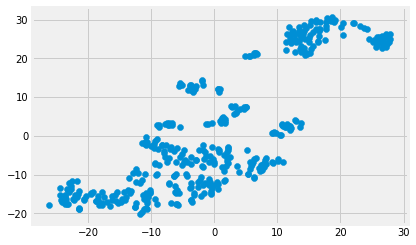

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Task 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [15]:
from sklearn.cluster import KMeans

In [16]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

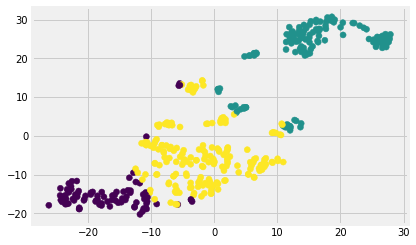

In [17]:
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [18]:
print('Среднее значение цены в кластере 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Среднее значение признака CRIM в кластере 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))

Среднее значение цены в кластере 0: 27.788372093023252
Среднее значение признака CRIM в кластере 0: 0.07356558139534886


In [19]:
print('Среднее значение цены в кластере 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Среднее значение признака CRIM в кластере 1: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))

Среднее значение цены в кластере 1: 16.165354330708666
Среднее значение признака CRIM в кластере 1: 0.07356558139534886


In [20]:
print('Среднее значение цены в кластере 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))
print('Среднее значение признака CRIM в кластере 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Среднее значение цены в кластере 2: 24.958115183246072
Среднее значение признака CRIM в кластере 2: 0.42166020942408367


### Task 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [23]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
print(f'До:\t{X_test_scaled.shape}')
print(f'После:\t{X_test_tsne.shape}')

До:	(102, 13)
После:	(102, 2)


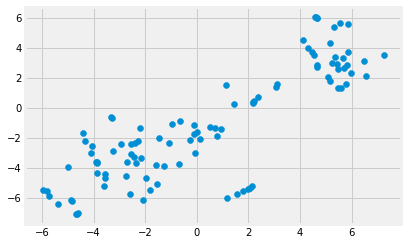

In [24]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

plt.show()

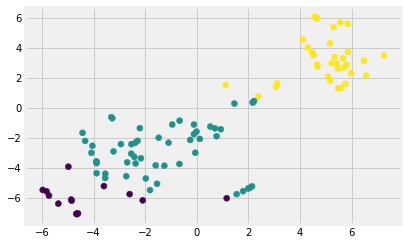

In [25]:
labels_test = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [26]:
print('Среднее значение цены в кластере 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Среднее значение признака CRIM в кластере 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))

Среднее значение цены в кластере 0: 33.871428571428574
Среднее значение признака CRIM в кластере 0: 0.08618571428571427


In [27]:
print('Среднее значение цены в кластере 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('Среднее значение признака CRIM в кластере 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))

Среднее значение цены в кластере 1: 21.552830188679245
Среднее значение признака CRIM в кластере 1: 0.25200716981132076


In [28]:
print('Среднее значение цены в кластере 2: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))
print('Среднее значение признака CRIM в кластере 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Среднее значение цены в кластере 2: 16.437142857142856
Среднее значение признака CRIM в кластере 2: 10.165531142857143
